In this lecture, we begin our journey to study deep learning in coding. Here we focus on the basic understanding how neural networks work and the basic ideas of the TensorFlow and kera package. In this lecture we use TensorFlow version 2.0. So we will be applying the command "pip install tensorflow==2.0" to the Anaconda prompt before the start of the notebook. 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

%matplotlib inline

### I. Overview on TensorFlow and Keras

TensorFlow is a open-source free and open-source software library for dataflow and differentiable programming across a range of tasks. In computer science, **dataflow programming** is a programming paradigm that models a program as a directed graph of the data flowing between operations, thus implementing dataflow principles and architecture. TensorFlow is a symbolic math library, and is also used for machine learning applications such as neural networks. It is used for both research and production at Google. 

Keras is an open-source library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library. Up until version 2.3 Keras supported multiple backends, including TensorFlow, Microsoft Cognitive Toolkit, R, Theano, and PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible. Keras can be run on TensorFlow so due to its popularity, Keras becomes the adopted API for tensoflow 2.0. So for the rest of the lecture, we focus on Keras syntax. 

Keras comes packaged with TensorFlow 2.0 as tensorflow.keras. To start using Keras, simply install TensorFlow 2.0. Keras/TensorFlow are compatible with:
   - Python 3.5–3.8
   - Ubuntu 16.04 or later
   - Windows 7 or later
   - macOS 10.12.6 (Sierra) or later.


In [2]:
path='C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\\Introduction to Data Science Using Python\\datasets'
os.chdir(path)

### II. Syntax of Keras For Regression Problems

Let's use a fake dataset and then apply a regression to the Keras framework as a motivating example. Suppose we have a fake dataset that contains two generic features, and want to use them to predict the response price. We can first perform some simple EDA on it before appying the regression model to it:

In [42]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


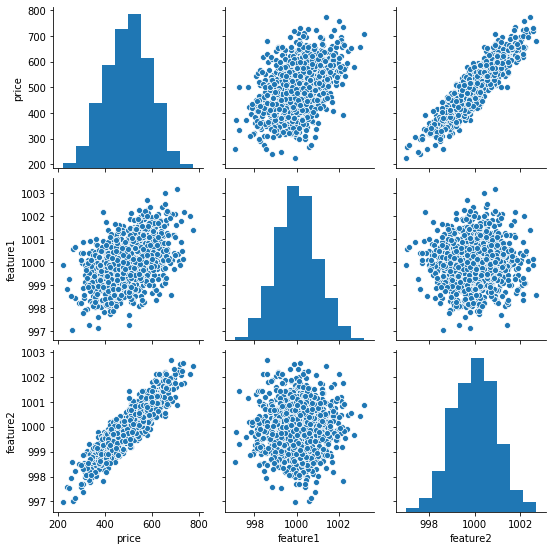

In [43]:
sns.pairplot(df)

Now let's do a test-train split:

In [44]:
X = df[['feature1','feature2']].values # returning a numpy array by adding ".value"
y = df['price'].values # these are labels, or targets 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(type(X_train))

(700, 2)
(300, 2)
(700,)
<class 'numpy.ndarray'>


For neural network, it's always important to standardize the data (the reason is because the weights can be easily sensitive to noises and outliers and standardization reduces the extent of overfitting.

In [45]:
scaler = MinMaxScaler() # creating an instance 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# help(MinMaxScaler)

Next we will train the model using neural network. The main tools we will be using include tensorflow.keras.models.Sequential() and tensorflow.keras.layers.dense() classes. The idea is to build a sequential model from scratch and then add layers on top of it. The idea of 'dense' is that we are going to create a feed-forward densely-connected neural net in which every neuron is connected with every other neuron in the next layer. 

There are two ways of creating a neural network. One way is to create a model as a list of layers. The other is to create a layer one by one. Below, we create two neural network models by using two different methods. The second method is always easier and convenient to edit. One we build the network topology, next we compile the model:

In [46]:
#help(Sequential)
#help(dense)

In [47]:
model1 = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2),
    Dense(units=1) # final layer very important
]) # units denotes the number of neurons (how many neurons will be in this layer)
# help(Sequential)

In [54]:
model2 = Sequential() # creating a linear stack of layers

model2.add(Dense(units=4, activation='relu'))
model2.add(Dense(units=4, activation='relu'))
model2.add(Dense(units=4, activation='relu'))
model2.add(Dense(units=1, activation='relu')) # final output node for prediction
# help(Dense)

We now need to compile the model. In this step, the most important thing is to pick the loss function as well as the optimizer. Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [55]:
model2.compile(optimizer='rmsprop',loss='mse')

Next, let's go over some concepts for training:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

The most important concept here is epoch. If epoch=1, that means it goes over the entire dataset once.  Usually you can set the epoch large and later impose some sstopping rule. For simplicity, let's ignore other parameters and train a simple model:

In [56]:
model2.fit(X_train,y_train,epochs=250, verbose=2) # higher number of verbosity means more sophisticated information

Train on 700 samples
Epoch 1/250
700/700 - 0s - loss: 256700.6390
Epoch 2/250
700/700 - 0s - loss: 256642.5818
Epoch 3/250
700/700 - 0s - loss: 256585.7248
Epoch 4/250
700/700 - 0s - loss: 256521.5798
Epoch 5/250
700/700 - 0s - loss: 256449.0937
Epoch 6/250
700/700 - 0s - loss: 256368.1296
Epoch 7/250
700/700 - 0s - loss: 256279.1723
Epoch 8/250
700/700 - 0s - loss: 256181.6811
Epoch 9/250
700/700 - 0s - loss: 256074.8644
Epoch 10/250
700/700 - 0s - loss: 255958.3523
Epoch 11/250
700/700 - 0s - loss: 255831.3959
Epoch 12/250
700/700 - 0s - loss: 255693.7437
Epoch 13/250
700/700 - 0s - loss: 255544.2136
Epoch 14/250
700/700 - 0s - loss: 255381.9502
Epoch 15/250
700/700 - 0s - loss: 255206.7651
Epoch 16/250
700/700 - 0s - loss: 255016.9238
Epoch 17/250
700/700 - 0s - loss: 254812.0322
Epoch 18/250
700/700 - 0s - loss: 254591.2669
Epoch 19/250
700/700 - 0s - loss: 254354.3562
Epoch 20/250
700/700 - 0s - loss: 254098.4495
Epoch 21/250
700/700 - 0s - loss: 253824.7901
Epoch 22/250
700/700 -

Epoch 182/250
700/700 - 0s - loss: 479.9854
Epoch 183/250
700/700 - 0s - loss: 462.1338
Epoch 184/250
700/700 - 0s - loss: 444.4895
Epoch 185/250
700/700 - 0s - loss: 428.1853
Epoch 186/250
700/700 - 0s - loss: 411.5211
Epoch 187/250
700/700 - 0s - loss: 395.5602
Epoch 188/250
700/700 - 0s - loss: 378.4384
Epoch 189/250
700/700 - 0s - loss: 362.2775
Epoch 190/250
700/700 - 0s - loss: 343.0816
Epoch 191/250
700/700 - 0s - loss: 330.2924
Epoch 192/250
700/700 - 0s - loss: 316.9785
Epoch 193/250
700/700 - 0s - loss: 302.5150
Epoch 194/250
700/700 - 0s - loss: 289.2059
Epoch 195/250
700/700 - 0s - loss: 276.2934
Epoch 196/250
700/700 - 0s - loss: 265.1198
Epoch 197/250
700/700 - 0s - loss: 252.4810
Epoch 198/250
700/700 - 0s - loss: 242.0114
Epoch 199/250
700/700 - 0s - loss: 231.6306
Epoch 200/250
700/700 - 0s - loss: 218.7721
Epoch 201/250
700/700 - 0s - loss: 209.0719
Epoch 202/250
700/700 - 0s - loss: 201.0728
Epoch 203/250
700/700 - 0s - loss: 189.5019
Epoch 204/250
700/700 - 0s - los

One thing that is always encouraged is to look at the trace of the evaluation metric: in this case, the MSE. We can plot the MSE using the followinng code. As you see below, the training loss keeps going down but once it passes somewhere around 120 the loss kind of plateaued:

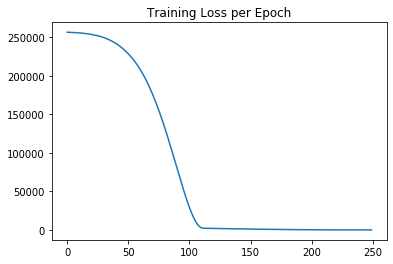

In [57]:
loss = model2.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

We now evaluate the model. Because we are dealing with a regression model and we chose our loss to be MSE, the following training and test scores correspond to MSE:

In [66]:
training_score = model2.evaluate(X_train,y_train,verbose=0)
test_score = model2.evaluate(X_test,y_test,verbose=0)
print(training_score)
print(test_score)

24.147423455374582
25.791061147054037


Now let's continue with our evaluation by comparing the test prediction with the true value of the test data:

In [67]:
test_predictions = model2.predict(X_test)
pred_df = pd.DataFrame(y_test,columns=['Test Y']) # turning the array into a 'DataFrame' object
test_predictions = pd.Series(test_predictions.reshape(len(y_test),)) # turning into a 'Series' object
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test Y','Model Predictions Yhat']
pred_df.head()

,Test Y,Model Predictions Yhat
0,402.296319,406.334351
1,624.156198,623.885010
2,582.455066,592.445923
3,578.588606,573.037109
4,371.224104,368.361115


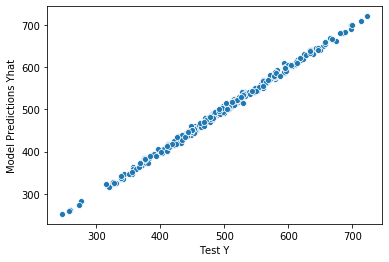

In [69]:
sns.scatterplot(x='Test Y',y='Model Predictions Yhat',data=pred_df)

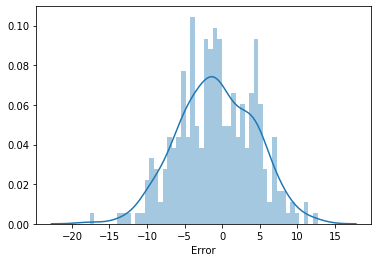

In [70]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions Yhat']
sns.distplot(pred_df['Error'],bins=50)

Now let's look at the evaluation metrics. Using MAE, it turns out that our prediction is 4 dollars off on average. The prediction looks very strong on the test dataset. In addition, the value for the explained_variance_score is 1 and we achieved 0.99 here. Explained variance score is calculated as $EVS(y, \hat{y})=1-\frac{Var(y-\hat{y})}{Var(y)}$. 

In [88]:
print(mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions Yhat'])) # on average off by 4 dollars
print(mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions Yhat']))
print(explained_variance_score(pred_df['Test Y'],pred_df['Model Predictions Yhat']))

4.118309407392447
25.79106483265752
0.9971427483869394


We can use this model to predict new data as well. Below, we give a pseudo value for prediction. Keep in mind that the model was trained on the scaled data. So we need to scale them using the transform() method:

In [74]:
newdata = [[998,1000]] # [[feature1, feature2]]
scaler.transform(newdata) # new data
newdata = scaler.transform(newdata)
model2.predict(newdata)

array([[421.22046]], dtype=float32)

We can save the trained model and later call it back. The 'h5' file type is the neural network version of the 'pickled' file:

In [77]:
model2.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [78]:
later_model = load_model('my_model.h5')
later_model.predict(newdata)

array([[421.22046]], dtype=float32)

### II. Syntax of Keras For Classification Problems

We now use Keras to do a classification problem. We will use the famous Wisconsin breast cancer dataset. Here is the basic information regarding this dataset:

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets. See https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [3]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Now let's do some simple explorative analysis:

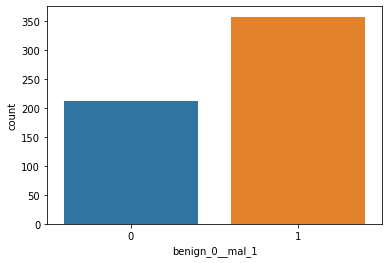

In [4]:
sns.countplot(x='benign_0__mal_1',data=df)

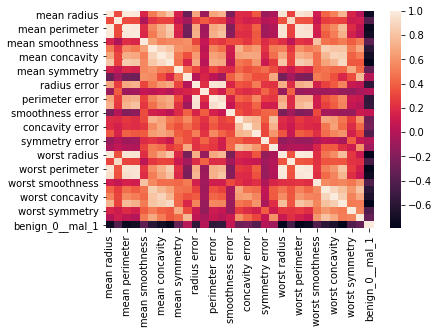

In [5]:
sns.heatmap(df.corr())

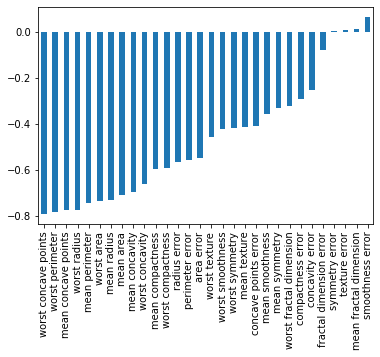

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') # plotting the correlations 

Let's do the train-test split as well as the normalization of the data:

In [7]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now let's train the model. So far, we have learned the basic syntax for a regression problem in Keras. What this example will show us is how we can apply the early stopping rule to automatically stop training based on a loss condition on the validation dataset passed during the model.fit() call. We will also learn how to add dropoff layers. Those are layers that can be used ot turn off neurons during training to prevent overfitting. Basically, each dropout layer will drop, or turn off a user-defined percentage of neuron units in the previous layer every batch. The word 'batch' has a special meaning in deep learning. One **batch** means one group of training samples.

In gradient descent algorithms, you can calculate the sum of gradients with respect to several examples and then update the parameters using this cumulative gradient. If you 'see' all training examples before one 'update', then it’s called **full batch learning**. If you use only one example, it’s called **stochastic gradient descent** (or **online learning**). If you use a small batch of examples, it’s often called **mini-batch learning**.

First, let's compile the model. Then we fit the model with a validation datset (using the test data). The argument "validation_data" below indicates the data on which to evaluate the loss and any model metrics at the end of each epoch (the model will not be trained on this data):

In [8]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) # sigmoid because we are dealing with binary classification problem

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [9]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 3s 6ms/sample - loss: 0.6900 - val_loss: 0.6664
Epoch 2/300
426/426 [==============================] - 0s 86us/sample - loss: 0.6502 - val_loss: 0.6310
Epoch 3/300
426/426 [==============================] - 0s 99us/sample - loss: 0.6139 - val_loss: 0.5891
Epoch 4/300
426/426 [==============================] - 0s 84us/sample - loss: 0.5676 - val_loss: 0.5386
Epoch 5/300
426/426 [==============================] - 0s 86us/sample - loss: 0.5143 - val_loss: 0.4822
Epoch 6/300
426/426 [==============================] - 0s 91us/sample - loss: 0.4581 - val_loss: 0.4233
Epoch 7/300
426/426 [==============================] - 0s 87us/sample - loss: 0.4015 - val_loss: 0.3675
Epoch 8/300
426/426 [==============================] - 0s 84us/sample - loss: 0.3540 - val_loss: 0.3242
Epoch 9/300
426/426 [==============================] - 0s 84us/sample - loss: 0.3147 - val_loss: 0.2855
Epoch 10/300
426/42

426/426 [==============================] - 0s 82us/sample - loss: 0.0451 - val_loss: 0.1332
Epoch 156/300
426/426 [==============================] - 0s 96us/sample - loss: 0.0443 - val_loss: 0.1290
Epoch 157/300
426/426 [==============================] - 0s 82us/sample - loss: 0.0444 - val_loss: 0.1320
Epoch 158/300
426/426 [==============================] - 0s 84us/sample - loss: 0.0497 - val_loss: 0.1243
Epoch 159/300
426/426 [==============================] - 0s 80us/sample - loss: 0.0446 - val_loss: 0.1309
Epoch 160/300
426/426 [==============================] - 0s 84us/sample - loss: 0.0429 - val_loss: 0.1337
Epoch 161/300
426/426 [==============================] - 0s 77us/sample - loss: 0.0429 - val_loss: 0.1387
Epoch 162/300
426/426 [==============================] - 0s 80us/sample - loss: 0.0423 - val_loss: 0.1331
Epoch 163/300
426/426 [==============================] - 0s 96us/sample - loss: 0.0442 - val_loss: 0.1360
Epoch 164/300
426/426 [==============================] - 0s 

Now let's plot the training loss as well as the validation loss:

In [13]:
model_loss = pd.DataFrame(model.history.history)
model_loss.rename(columns={'loss': 'training loss'}, inplace=True)
model_loss.head()

,training loss,val_loss
0,0.689978,0.666404
1,0.650241,0.631030
2,0.613897,0.589114
3,0.567630,0.538612
4,0.514272,0.482162


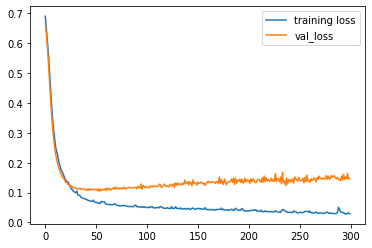

In [14]:
model_loss.plot()

The picture above shows a prime example of overfitting (in this case, too many epochs). What happens is that the training loss keeps going down while at some point the validation loss starts to pick up. To avoid this, we need to implement early stopping rule. To do so, let's retrain the model first. And then we create an instance called 'early_stop'. Below we create an early stopping rule that monitors the validation loss, and we will wait 25 epochs even after we detected a stopping point just to be safe and robust to noise etc. that could occur:

In [17]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) # sigmoid because we are dealing with binary classification problem

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) # we pick 'min' because we want to minimize the loss

model.fit(x=X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 0s 1ms/sample - loss: 0.6824 - val_loss: 0.6566
Epoch 2/300
426/426 [==============================] - 0s 101us/sample - loss: 0.6314 - val_loss: 0.6164
Epoch 3/300
426/426 [==============================] - 0s 96us/sample - loss: 0.5952 - val_loss: 0.5784
Epoch 4/300
426/426 [==============================] - 0s 89us/sample - loss: 0.5574 - val_loss: 0.5346
Epoch 5/300
426/426 [==============================] - 0s 87us/sample - loss: 0.5097 - val_loss: 0.4779
Epoch 6/300
426/426 [==============================] - 0s 96us/sample - loss: 0.4568 - val_loss: 0.4252
Epoch 7/300
426/426 [==============================] - 0s 82us/sample - loss: 0.4089 - val_loss: 0.3772
Epoch 8/300
426/426 [==============================] - 0s 87us/sample - loss: 0.3646 - val_loss: 0.3324
Epoch 9/300
426/426 [==============================] - 0s 94us/sample - loss: 0.3232 - val_loss: 0.2958
Epoch 10/300
426/4

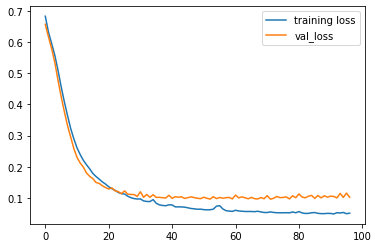

In [19]:
model_loss = pd.DataFrame(model.history.history)
model_loss.rename(columns={'loss': 'training loss'}, inplace=True)
model_loss.plot()

Now looking at the picture, we see that result is better. Notice that the validation loss is greater than the training loss. but this is ok because as long as the validation loss doesn't start to rise, we should be good.

Another thing one can do to prevent overfitting is to add a dropout layer so that it can turn off a certain percentage of neurons. Again, below is the example. We first retrain the model, but this time, notice that we add in the 'drop-out' call. 

In [21]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.4)) # probability that you randomly turn off the neurons
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.4)) # 40% of the neurons will be turned off randomly
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 1s 2ms/sample - loss: 0.6996 - val_loss: 0.6737
Epoch 2/300
426/426 [==============================] - 0s 94us/sample - loss: 0.6766 - val_loss: 0.6562
Epoch 3/300
426/426 [==============================] - 0s 96us/sample - loss: 0.6614 - val_loss: 0.6409
Epoch 4/300
426/426 [==============================] - 0s 86us/sample - loss: 0.6395 - val_loss: 0.6209
Epoch 5/300
426/426 [==============================] - 0s 110us/sample - loss: 0.6286 - val_loss: 0.5926
Epoch 6/300
426/426 [==============================] - 0s 91us/sample - loss: 0.6022 - val_loss: 0.5632
Epoch 7/300
426/426 [==============================] - 0s 96us/sample - loss: 0.5721 - val_loss: 0.5322
Epoch 8/300
426/426 [==============================] - 0s 94us/sample - loss: 0.5661 - val_loss: 0.4980
Epoch 9/300
426/426 [==============================] - 0s 101us/sample - loss: 0.5211 - val_loss: 0.4613
Epoch 10/300
426/

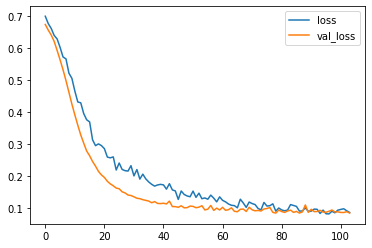

In [22]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Lastly, let's look at prediction and model evaluation. Our model only misclassified 2 points on the test set (see the confusion_matrix in the North East corner). Accuracy is a good performance measure here because the class imbalance is not significant. 

In [24]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [25]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]


### References:
   - https://keras.io/api/optimizers/rmsprop/
   - https://keras.io/getting_started/intro_to_keras_for_researchers/
   - https://keras.io/getting_started/intro_to_keras_for_engineers/
   - https://keras.io/getting_started/learning_resources/
   - https://keras.rstudio.com/reference/fit.html
   - https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
   - https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
   - https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
   - https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
   - https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
   - K. P. Bennett (1992), "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101.
   - K. P. Bennett and O. L. Mangasarian (1992): "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 23-34.